# Hyun Ki Kim

# 12/04/2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as hr

%matplotlib inline

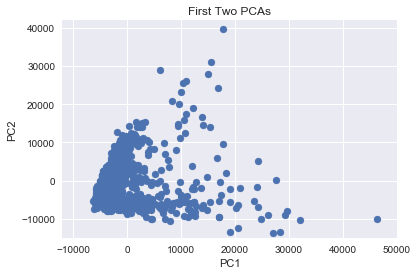

In [2]:
df = pd.read_csv('College.csv')
del df["Private"]
pca = pd.DataFrame(PCA().fit(df).components_.T[:, :2], index = df.columns, columns = ['PC1', 'PC2'])

plt.xlim(-12000, 50000)
plt.ylim(-15000, 42000)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First Two PCAs')

plt.scatter(x = pd.DataFrame(PCA().fit_transform(df)[:, :2], columns = ['PC1', 'PC2', ])['PC1'],\
            y = pd.DataFrame(PCA().fit_transform(df)[:, :2], columns = ['PC1', 'PC2', ])['PC2'])

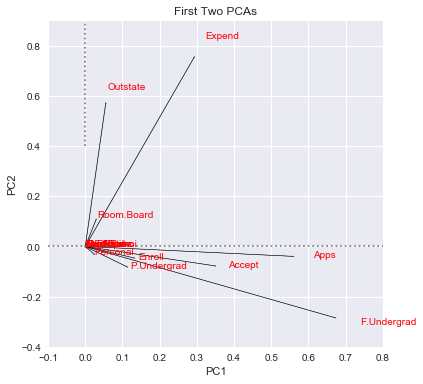

In [3]:
ax = plt.subplots(figsize= (6,6))[1]
ax.set_xlim(-0.1, 0.8)
ax.set_ylim(-0.4, 0.9)
ax.hlines(0, -0.1, 0.8, linestyles='dotted', colors='grey')
ax.vlines(0, 0.4, 0.9, linestyles='dotted', colors='grey')
ax.set_title('First Two PCAs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

a = 1.1
for i in pca[['PC1', 'PC2']].index:
    ax.annotate(i, (pca['PC1'].loc[i]*a, pca['PC2'].loc[i]*a), color='red')

for i in range(len(df.columns)):
    ax.arrow(0,0,pca['PC1'][i], pca['PC2'][i])

F.Undergrad, Apps, Accept are strongly correlated on the first principal component and Expend, Outstate are strongly correlated on the second principal component.

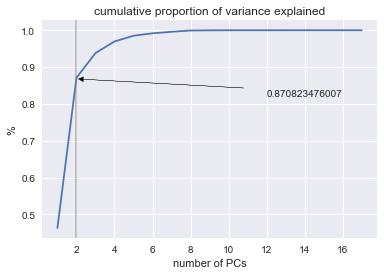

In [4]:
plt.plot(list(range(1,len(df.columns)+1)), np.cumsum(PCA().fit(df).explained_variance_ratio_))
plt.title('cumulative proportion of variance explained')
plt.xlabel('number of PCs')
plt.ylabel('%')
plt.axvline(x=2, color='gray', alpha=0.5)
plt.annotate(np.cumsum(PCA().fit(df).explained_variance_ratio_)[1],\
             xy = (1, np.cumsum(PCA().fit(df).explained_variance_ratio_)[1]),\
             xytext = (12, np.cumsum(PCA().fit(df).explained_variance_ratio_)[1] - 0.05),\
             arrowprops = dict(color = 'k', shrink = 0.1, width = 0.01, headlength = 5, headwidth = 5))

In [5]:
df = pd.read_csv('USArrests.csv', index_col=0)
pca_2_df = pd.DataFrame(PCA().fit_transform(df)[:, :2],index = df.index, columns = ['PC1', 'PC2', ])

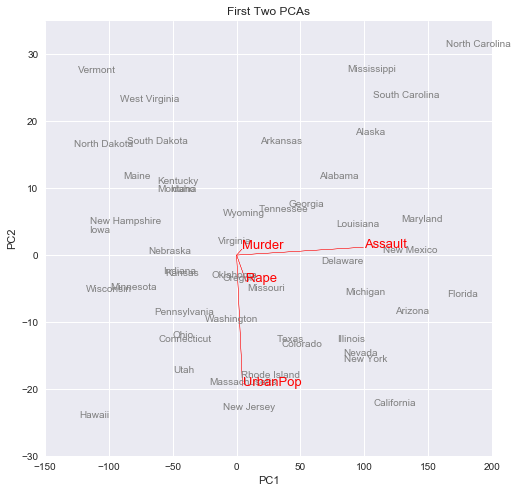

In [6]:
plt.figure(figsize= (8,8))
plt.xlim(-150, 200)
plt.ylim(-30, 35)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First Two PCAs')

for i in pca_2_df.index:
    plt.annotate(i, (pca_2_df.loc[i]['PC1'], pca_2_df.loc[i]['PC2']), color = 'grey')

pca = pd.DataFrame(PCA().fit(df).components_.T[:, :2], index = df.columns, columns = ['PC1', 'PC2'])

for i in range(len(df.columns)):
    x = pca.iloc[i, 0]
    y = pca.iloc[i, 1]
    plt.arrow(0, 0, x*100, y*20, color='red')
    plt.text(x*100, y*20, pca.index[i], color='red', fontsize=13)

In [7]:
def plot_k_means(n):
    km = KMeans(n_clusters=n).fit(df)
    ax = plt.subplots(figsize=(6,6))[1]
    clusters = km.labels_
    ax.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'], marker = '.', c = clusters)
    ax.set_title(str(n) + '-means clustering')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

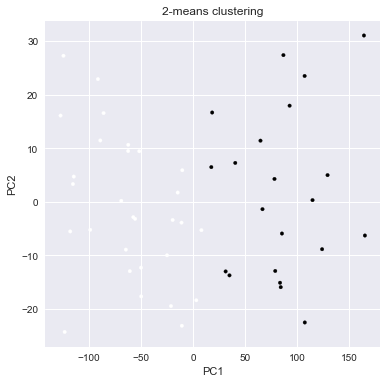

In [8]:
plot_k_means(2)

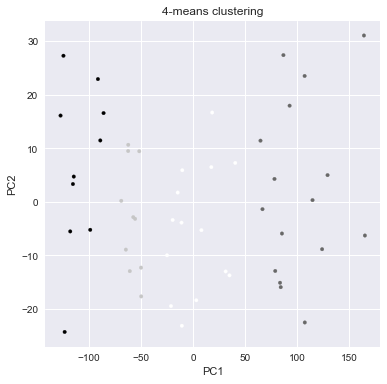

In [9]:
plot_k_means(4)

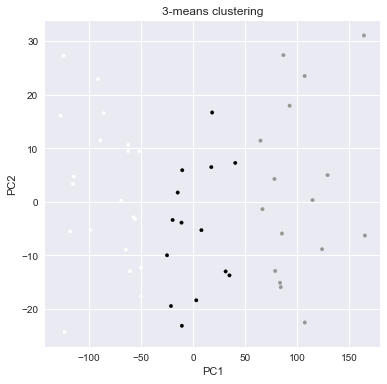

In [10]:
plot_k_means(3)

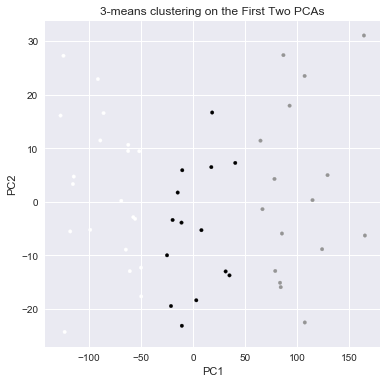

In [11]:
km = KMeans(3).fit(df)
ax = plt.subplots(figsize=(6,6))[1]
clusters = km.labels_
ax.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'], marker = '.', c = clusters)
ax.set_title('3-means clustering on the First Two PCAs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Result of 3-means clustering on the first two principal components score vectors and the raw data looks the same.

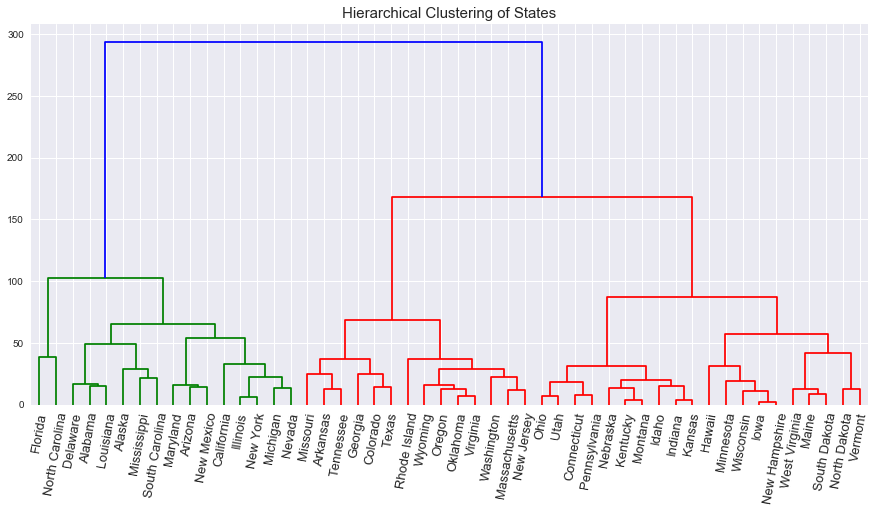

In [12]:
def hierarchical_clustering(df):
    l = hr.linkage(df, method='complete', metric='euclidean')
    plt.figure(figsize = (15, 7))
    dn = hr.dendrogram(l, labels = df.index, leaf_font_size = 13, leaf_rotation = 80)
    plt.title('Hierarchical Clustering of States', size=15)

hierarchical_clustering(df)

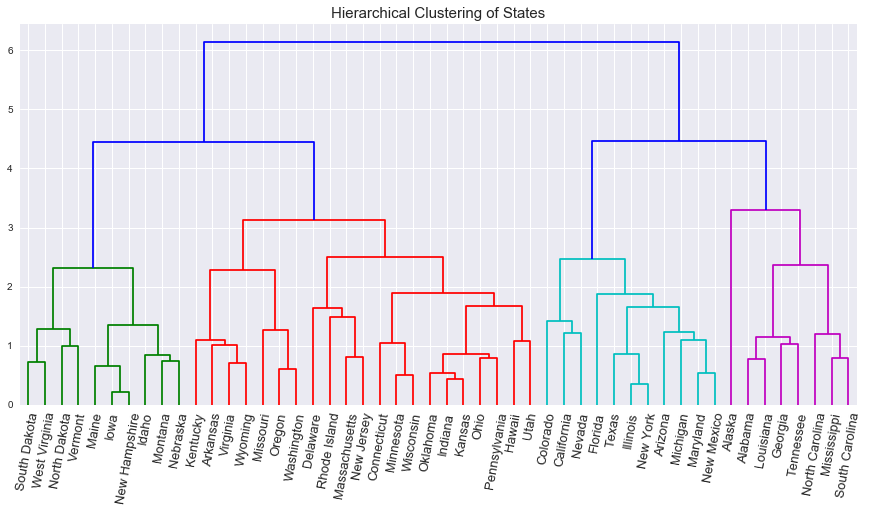

In [13]:
scalar = StandardScaler(with_std = 1)
scaled = scalar.fit_transform(df)
df_scaled = pd.DataFrame(scaled, index = df.index, columns = df.columns)
hierarchical_clustering(df_scaled)

Clustering after scaling the variables to have standard deviation of 1 allows states to be less frequently clustered with other states in the early stage.